In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [2]:
# List of all the columns in the data set
print(diabetes_data_df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')


## Drop Non-Beneficial Columns

In [35]:
# Drop the non-beneficial ID columns, 'PatientID' and 'DoctorInCharge'.
diabetes_data_clean_df = diabetes_data_df.drop(columns=['PatientID', 'Ethnicity',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FastingBloodSugar', 'HbA1c','HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'DoctorInCharge'])

In [4]:
diabetes_data_clean_df

,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,2,1,32.985284,1,4.499365,2.443385,4.898831,4.049885,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,1,2,39.916764,0,1.578919,8.301264,8.941093,7.508150,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,1,3,19.782251,0,1.177301,6.103395,7.722543,7.708387,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,2,32.376881,1,1.714621,8.645465,4.804044,6.286548,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,1,3,16.808600,0,15.462549,4.629383,2.532756,9.771125,37.731808,0,0,0,1.218452,6.977741,7.887940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,2,2,20.811137,0,10.946207,3.217636,8.338196,8.703430,88.122729,0,0,1,3.154225,3.849584,8.805087,0
1875,80,1,2,2,27.694312,0,16.067905,7.107335,3.034771,4.472689,77.128599,0,0,1,0.424893,5.217465,0.915878,1
1876,38,1,0,2,35.640824,0,4.865124,9.881212,2.657002,4.812610,13.148221,0,0,0,0.553757,3.377744,3.017481,1
1877,43,0,2,0,32.423016,0,6.362936,4.750079,8.736024,7.017390,54.370980,0,0,0,1.132470,0.009250,4.914556,1


In [36]:
print(diabetes_data_clean_df.nunique())

Age                           71
Gender                         2
SocioeconomicStatus            3
EducationLevel                 4
BMI                         1879
Smoking                        2
AlcoholConsumption          1879
PhysicalActivity            1879
DietQuality                 1879
SleepQuality                1879
QualityOfLifeScore          1879
WaterQuality                   2
MedicalCheckupsFrequency    1879
MedicationAdherence         1879
HealthLiteracy              1879
Diagnosis                      2
dtype: int64


## Binning w/ Logarithmic Transformation

**Columns:** 'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                        'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
                        'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
                        'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels',
                        'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence',
                        'HealthLiteracy'
                      


In [47]:
print(diabetes_data_clean_df.columns)

Index(['Age', 'Gender', 'SocioeconomicStatus', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'QualityOfLifeScore', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis'],
      dtype='object')


In [38]:
def log_transform_and_bin(diabetes_data_clean_df, columns, num_bins=10, drop_original=True):
    """
    Logarithmically transform specified columns, bin them, and optionally drop the original columns.

    Parameters:
        diabetes_data_clean_df (pd.DataFrame): The DataFrame to be transformed.
        columns (list): List of columns to log-transform and bin.
        num_bins (int): The number of bins to create. Default is 10.
        drop_original (bool): If True, drop the original columns. Default is True.

    Returns:
        pd.DataFrame: The transformed DataFrame with binned columns.
    """

    transformed_df = diabetes_data_clean_df.copy()

    for col in columns:
        # Log-transform the specified column
        transformed_df[f'Log_{col}'] = np.log1p(transformed_df[col])

        # Create bins based on the log-transformed values
        log_bins = pd.cut(transformed_df[f'Log_{col}'], bins=num_bins)

        # Access the bin edges from the categorical object
        bin_edges_log_scale = log_bins.cat.categories

        # Reverse the logarithmic transformation to get the bin edges on the original scale
        bin_edges = np.expm1([bin_edges_log_scale.left.min()] + list(bin_edges_log_scale.right))

        # Ensure bin edges are unique
        bin_edges = np.unique(bin_edges)

        # Create bin labels corresponding to the reversed log-transformed bin edges
        bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1]-1)}' for i in range(len(bin_edges)-1)]

        # Assign the custom labels and create the binned column in the original DataFrame
        transformed_df[f'{col}_Bins'] = pd.cut(transformed_df[col], bins=bin_edges, labels=bin_labels, right=False, ordered=False)

        # Optionally drop the original and temporary Log column
        if drop_original:
            transformed_df.drop(columns=[col, f'Log_{col}'], inplace=True)
        else:
            transformed_df.drop(columns=[f'Log_{col}'], inplace=True)

    return transformed_df

# Example usage
# Assuming 'diabetes_data_clean_df' is already defined and has the specified columns
columns_to_transform = ['Age','BMI',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality','QualityOfLifeScore',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
        ]

transformed_df = log_transform_and_bin(diabetes_data_clean_df, columns_to_transform)

# Display the first few rows of the transformed DataFrame
print(transformed_df.head())



   Gender  SocioeconomicStatus  EducationLevel  Smoking  WaterQuality  \
0       0                    2               1        1             0   
1       1                    1               2        0             1   
2       1                    1               3        0             0   
3       1                    1               2        1             1   
4       1                    1               3        0             0   

   Diagnosis Age_Bins BMI_Bins AlcoholConsumption_Bins PhysicalActivity_Bins  \
0          1    42-48    29-31                     3-4                   2-2   
1          1    49-56    36-39                     1-1                   7-8   
2          0    77-89    18-19                     0-0                   5-6   
3          0    19-22    29-31                     1-1                   7-8   
4          0    23-26    16-17                   14-18                   4-4   

  DietQuality_Bins SleepQuality_Bins QualityOfLifeScore_Bins  \
0              4

In [39]:
transformed_df.head(5)

,Gender,SocioeconomicStatus,EducationLevel,Smoking,WaterQuality,Diagnosis,Age_Bins,BMI_Bins,AlcoholConsumption_Bins,PhysicalActivity_Bins,DietQuality_Bins,SleepQuality_Bins,QualityOfLifeScore_Bins,MedicalCheckupsFrequency_Bins,MedicationAdherence_Bins,HealthLiteracy_Bins
0,0,2,1,1,0,1,42-48,29-31,3-4,2-2,4-4,4-3,62-98,1-1,4-4,5-6
1,1,1,2,0,1,1,49-56,36-39,1-1,7-8,7-9,7-6,62-98,3-2,5-6,4-4
2,1,1,3,0,0,0,77-89,18-19,0-0,5-6,7-9,7-7,39-61,2-2,7-9,5-6
3,1,1,2,1,1,0,19-22,29-31,1-1,7-8,4-4,5-5,62-98,1-0,2-2,4-4
4,1,1,3,0,0,0,23-26,16-17,14-18,4-4,2-2,9-8,24-38,0-0,5-6,7-8


In [9]:
print(transformed_df.nunique())

Gender                            2
SocioeconomicStatus               3
EducationLevel                    4
Smoking                           2
HeavyMetalsExposure               2
OccupationalExposureChemicals     2
WaterQuality                      2
Diagnosis                         2
Age_Bins                         10
BMI_Bins                         10
AlcoholConsumption_Bins           8
PhysicalActivity_Bins             8
DietQuality_Bins                  8
SleepQuality_Bins                 9
QualityOfLifeScore_Bins           9
MedicalCheckupsFrequency_Bins     6
MedicationAdherence_Bins          8
HealthLiteracy_Bins               8
dtype: int64


## Dummies

In [40]:
# Convert categorical data to numeric with `pd.get_dummies`
transformed_dummies_df = pd.get_dummies(transformed_df, columns=['SocioeconomicStatus', 'EducationLevel',
       'Age_Bins', 'BMI_Bins', 'AlcoholConsumption_Bins',
       'PhysicalActivity_Bins', 'DietQuality_Bins', 'SleepQuality_Bins',
       'QualityOfLifeScore_Bins', 'MedicalCheckupsFrequency_Bins',
       'MedicationAdherence_Bins', 'HealthLiteracy_Bins'])
transformed_dummies_df.head()

,Gender,Smoking,WaterQuality,Diagnosis,SocioeconomicStatus_0,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,...,MedicationAdherence_Bins_5-6,MedicationAdherence_Bins_7-9,HealthLiteracy_Bins_0-0,HealthLiteracy_Bins_1-0,HealthLiteracy_Bins_1-1,HealthLiteracy_Bins_2-2,HealthLiteracy_Bins_3-3,HealthLiteracy_Bins_4-4,HealthLiteracy_Bins_5-6,HealthLiteracy_Bins_7-8
0,0,1,0,1,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,1,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,False
2,1,0,0,0,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,1,0,0,0,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


## Identify Target (y) and Features (X)

In [41]:
# Split our preprocessed data into our features and target arrays
y = transformed_dummies_df["Diagnosis"]
X = transformed_dummies_df.drop(columns="Diagnosis")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(1409, 94)

In [42]:
print(X_train.dtypes)

Gender                     int64
Smoking                    int64
WaterQuality               int64
SocioeconomicStatus_0       bool
SocioeconomicStatus_1       bool
                           ...  
HealthLiteracy_Bins_2-2     bool
HealthLiteracy_Bins_3-3     bool
HealthLiteracy_Bins_4-4     bool
HealthLiteracy_Bins_5-6     bool
HealthLiteracy_Bins_7-8     bool
Length: 94, dtype: object


## StandardScaler

In [43]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Neural Network #1

In [44]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu", input_dim=n_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=8, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 10)                  │             950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[checkpoint_callback])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3966 - loss: 0.7772
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4134 - loss: 0.7178
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5359 - loss: 0.6902
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6014 - loss: 0.6776
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 0.6700
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6026 - loss: 0.6661
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 0.6618
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6678
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6061 - loss: 0.6610
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.6606
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 0.6551
Epoch 12/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - 6ms/step - accuracy: 0.5043 - loss: 1.5424
Loss: 1.5423848628997803, Accuracy: 0.5042552947998047


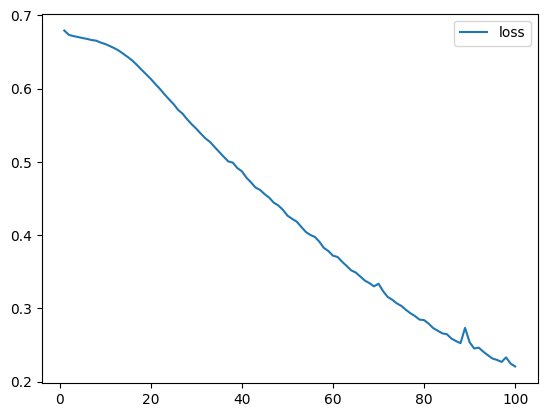

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

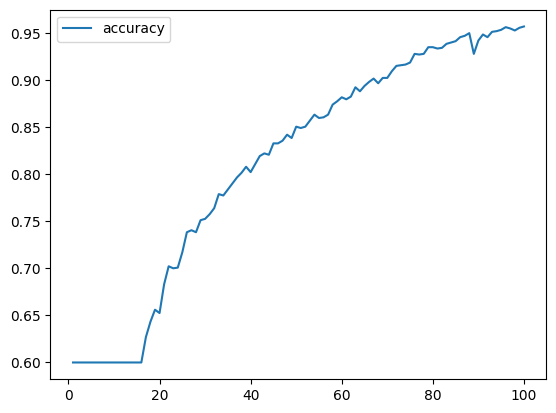

In [19]:
history_df.plot(y="accuracy")
plt.show()

# Auto Optimization

In [25]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.0 MB/s eta 0:00:00


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import keras_tuner as kt
import tensorflow as tf
from sklearn.datasets import make_moons

In [27]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=8,
        max_value=128,
        step=8), activation=activation, input_dim=n_features))

    # Allow kerastuner to decide the number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=8,
            max_value=128,
            step=8),
            activation=activation))

        # Optionally add dropout for regularization
        if hp.Choice('add_dropout_' + str(i), [True, False]):
            nn_model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                                               min_value=0.0,
                                                               max_value=0.5,
                                                               step=0.1)))

    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    optimizer = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    nn_model.compile(loss="binary_crossentropy",
                     optimizer=optimizer,
                     metrics=["accuracy"])

    return nn_model

In [28]:
# Import the kerastuner library
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.6042553186416626

Best val_accuracy So Far: 0.6127659678459167
Total elapsed time: 00h 06m 22s


In [30]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 56,
 'num_layers': 5,
 'units_0': 80,
 'add_dropout_0': 0,
 'dropout_0': 0.0,
 'optimizer': 'adam',
 'units_1': 32,
 'add_dropout_1': 1,
 'dropout_1': 0.0,
 'units_2': 104,
 'add_dropout_2': 1,
 'dropout_2': 0.2,
 'units_3': 56,
 'add_dropout_3': 0,
 'dropout_3': 0.1,
 'units_4': 40,
 'add_dropout_4': 0,
 'dropout_4': 0.1,
 'units_5': 128,
 'add_dropout_5': 1,
 'dropout_5': 0.30000000000000004,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [31]:
# Define the model - deep neural net
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=best_hyper['first_units'], activation=best_hyper['activation'], input_dim=n_features))

# Add additional hidden layers based on num_layers
for i in range(best_hyper['num_layers']):
    nn.add(tf.keras.layers.Dense(units=best_hyper[f'units_{i}'], activation=best_hyper['activation']))

    # Add dropout if specified
    if best_hyper[f'add_dropout_{i}']:
        nn.add(tf.keras.layers.Dropout(rate=best_hyper[f'dropout_{i}']))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(optimizer=best_hyper['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 56)                  │           5,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 80)                  │           4,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 104)                 │           3,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 104)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 56)                  │           5,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 40)                  │           2,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,217 (94.60 KB)

 Trainable params: 24,217 (94.60 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled)
)

# Train the model and pass the callback
fit_model = nn.fit(X_train_scaled, y_train, epochs=20, callbacks=[checkpoint_callback])


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5297 - loss: 0.6953
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6061 - loss: 0.6655
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6117 - loss: 0.6544
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6655 - loss: 0.6208
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6620 - loss: 0.6147
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6923 - loss: 0.5901
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7124 - loss: 0.5395
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7478 - loss: 0.5276
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7844 - loss: 0.4666
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.4966
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8085 - loss: 0.4207
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - lo

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - 19ms/step - accuracy: 0.5277 - loss: 2.0882
Loss: 2.0881927013397217, Accuracy: 0.5276595950126648


# Weakest and Strongest Features

In [20]:
!pip install scikeras scikit-learn

In [21]:
!pip install --upgrade scipy scikit-learn scikeras

In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Ensure that nn is defined as your Keras model

# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test_scaled.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")




Weakest feature: PhysicalActivity_Bins_7-8 with importance -0.014042553191489403
Weakest feature: OccupationalExposureChemicals with importance -0.014042553191489403
Weakest feature: EducationLevel_1 with importance -0.012340425531914934
Weakest feature: SocioeconomicStatus_0 with importance -0.011914893617021327
Weakest feature: Age_Bins_27-30 with importance -0.009574468085106414
Weakest feature: SleepQuality_Bins_4-3 with importance -0.009148936170212807
Weakest feature: SleepQuality_Bins_5-4 with importance -0.009148936170212807
Weakest feature: PhysicalActivity_Bins_4-4 with importance -0.00829787234042556
Weakest feature: MedicationAdherence_Bins_1-1 with importance -0.008085106382978768
Weakest feature: HeavyMetalsExposure with importance -0.008085106382978758
Weakest feature: BMI_Bins_18-19 with importance -0.007446808510638348
Weakest feature: PhysicalActivity_Bins_1-1 with importance -0.007446808510638336
Weakest feature: SleepQuality_Bins_7-7 with importance -0.0072340425531

In [23]:
# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test_scaled.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")

Strongest feature: BMI_Bins_15-15 with importance 0.01085106382978725
Strongest feature: Age_Bins_49-56 with importance 0.007659574468085123
Strongest feature: HealthLiteracy_Bins_0-0 with importance 0.007659574468085123
Strongest feature: HealthLiteracy_Bins_1-1 with importance 0.0070212765957446965
Strongest feature: BMI_Bins_24-26 with importance 0.006170212765957472
Strongest feature: SleepQuality_Bins_7-6 with importance 0.005744680851063855
Strongest feature: PhysicalActivity_Bins_1-0 with importance 0.005106382978723428
Strongest feature: HealthLiteracy_Bins_2-2 with importance 0.0044680851063830076
Strongest feature: QualityOfLifeScore_Bins_0-0 with importance 0.0044680851063830015
Strongest feature: AlcoholConsumption_Bins_5-6 with importance 0.004255319148936188
Strongest feature: SleepQuality_Bins_5-5 with importance 0.0038297872340425807
Strongest feature: BMI_Bins_16-17 with importance 0.0031914893617021657
Strongest feature: BMI_Bins_29-31 with importance 0.00297872340425